In [6]:
import sys
sys.path.append('../figures/')

import arviz as az
import jax.numpy as jnp
import numpyro.distributions as dist
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf
from jax import random

from astropy.cosmology import Planck15
import astropy.units as u
from makeCorner import *

az.rcParams["plot.max_subplots"] = 80
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

logit_std = 2.5
tmp_max = 100.
tmp_min = 2.

In [9]:
cdf_file = "./RUNS/CBC_O3_Reverse_Sector.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [10]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(20,50),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "delta_alpha_z": dist.Normal(0,1),
    "log_width_alpha_z": dist.Uniform(-1,1),
    "middle_m_alpha_z": dist.Uniform(30,75),
    "beta_z":dist.Uniform(0,10),
    "high_beta_z": dist.Uniform(0,10),
    "log_width_beta_z": dist.Uniform(-1,1),
    "middle_m_beta_z": dist.Uniform(30,75),
    "low_zp": dist.Uniform(0.2,4),
    "high_zp": dist.Uniform(0.2,4),
    "log_width_zp": dist.Uniform(-1,1),
    "middle_m_zp": dist.Uniform(30,75),
    "sig_m1": dist.Uniform(1.5, 15)
}

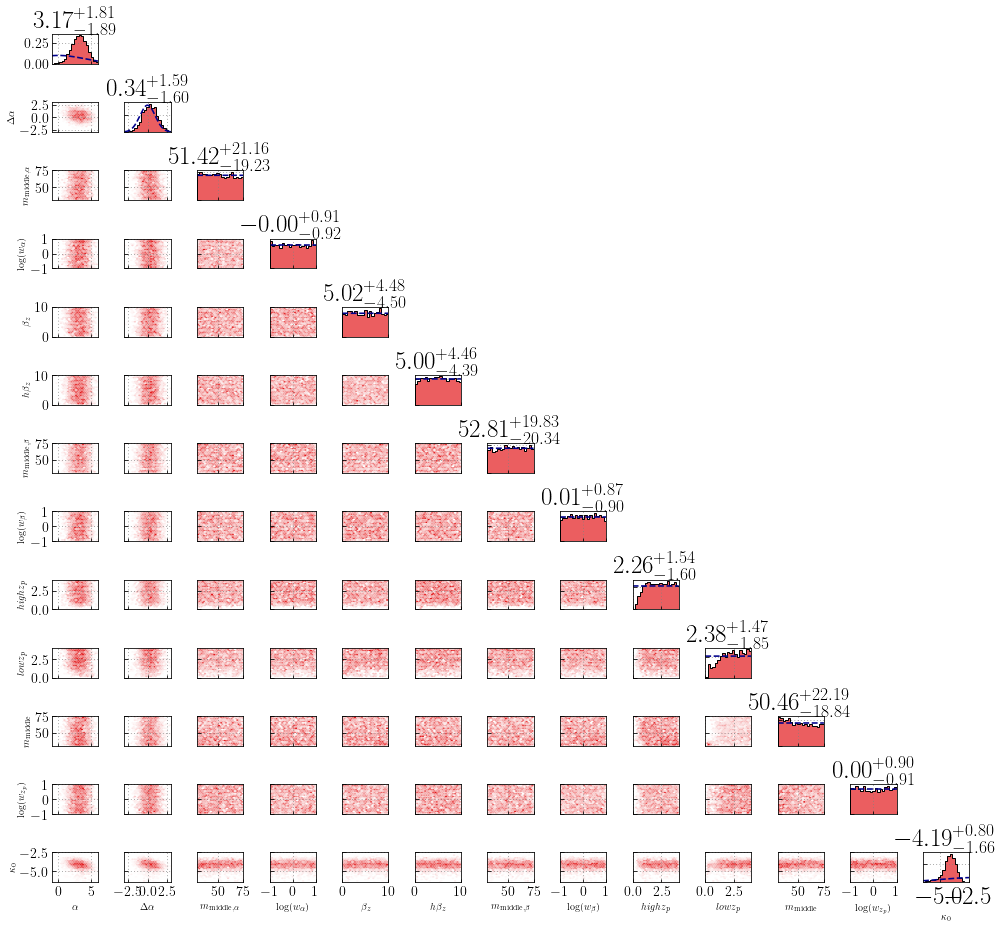

In [18]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,6),"label":r"$\alpha$"},
    "delta_alpha_z":{"data":stacked_samples_no_GWB.delta_alpha_z,"plot_bounds":(-3,3),"label":r"$\Delta \alpha$"},
    "middle_m_alpha_z":{"data":stacked_samples_no_GWB.middle_m_alpha_z,"plot_bounds":(30,75),"label":r"$m_{\rm middle, \alpha}$"},
    "log_width_alpha_z":{"data":stacked_samples_no_GWB.log_width_alpha_z,"plot_bounds":(-1,1),"label":r"log($w_{\alpha}$)"},
    "beta_z":{"data":stacked_samples_no_GWB.beta_z,"plot_bounds":(0,10),"label":r"$\beta_z$"},
    "high_beta_z":{"data":stacked_samples_no_GWB.high_beta_z, "plot_bounds":(0,10),"label":r"$h \beta_z$"},
    "middle_m_beta_z":{"data":stacked_samples_no_GWB.middle_m_beta_z,"plot_bounds":(30,75),"label":r"$m_{\rm middle, \beta}$"},
    "log_width_beta_z":{"data":stacked_samples_no_GWB.log_width_beta_z,"plot_bounds":(-1,1),"label":r"log($w_{\beta}$)"},
    "high_zp":{"data":stacked_samples_no_GWB.high_zp,"plot_bounds":(0,4),"label":r"$high z_p$"},
    "low_zp":{"data":stacked_samples_no_GWB.low_zp,"plot_bounds":(0,4),"label":r"$low z_p$"},
    "middle_m_zp":{"data":stacked_samples_no_GWB.middle_m,"plot_bounds":(30,75),"label":r"$m_{\rm middle}$"},
    "log_width_zp":{"data":stacked_samples_no_GWB.log_width_zp,"plot_bounds":(-1,1),"label":r"log($w_{z_p}$)"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},  
}

plot_corner(fig,toPlot_no_GWB,'#e31a1c',labelsize=10, priors = new_priors)
plt.savefig("HDPosterior_together_all.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()

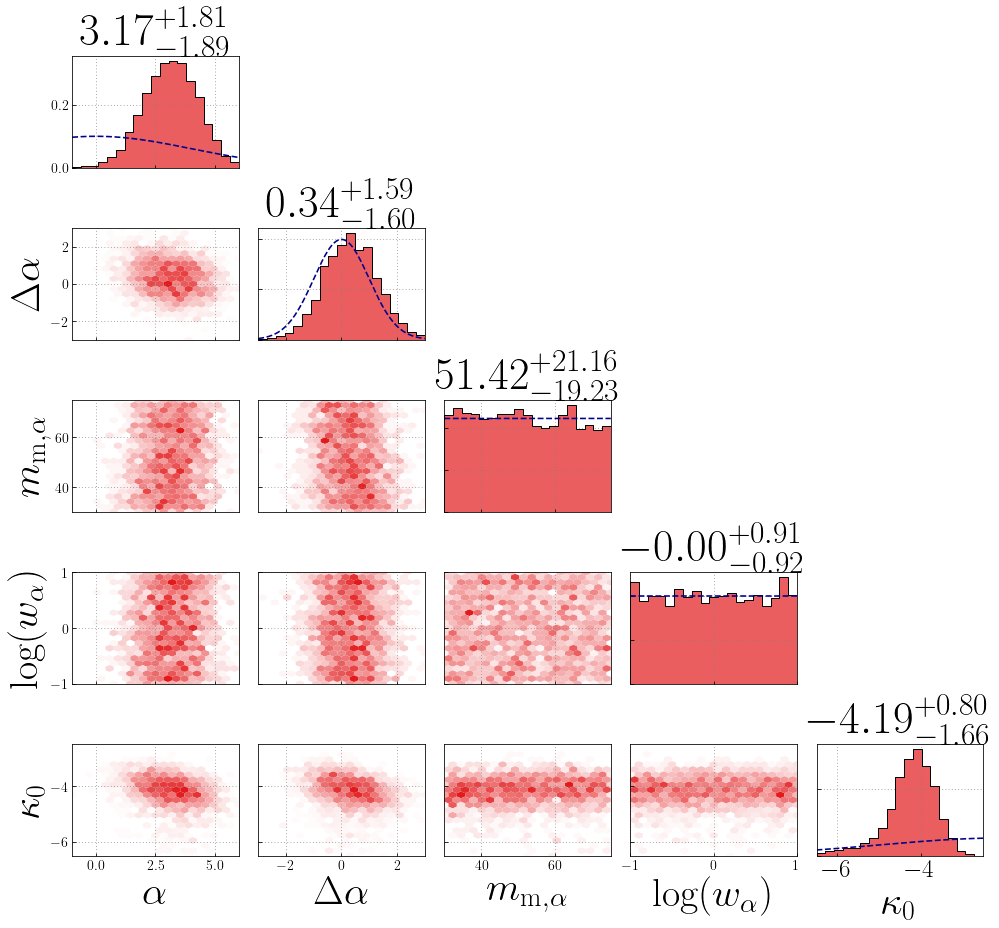

In [14]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,6),"label":r"$\alpha$"},
    "delta_alpha_z":{"data":stacked_samples_no_GWB.delta_alpha_z,"plot_bounds":(-3,3),"label":r"$\Delta \alpha$"},
    "middle_m_alpha_z":{"data":stacked_samples_no_GWB.middle_m_alpha_z,"plot_bounds":(30,75),"label":r"$m_{\rm m, \alpha}$"},
    "log_width_alpha_z":{"data":stacked_samples_no_GWB.log_width_alpha_z,"plot_bounds":(-1,1),"label":r"log($w_{\alpha}$)"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},
}

plot_corner(fig,toPlot_no_GWB,'#e31a1c',labelsize=40, priors = new_priors)
plt.savefig("HDPosterior_together_all.png", dpi=600, bbox_inches='tight')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()

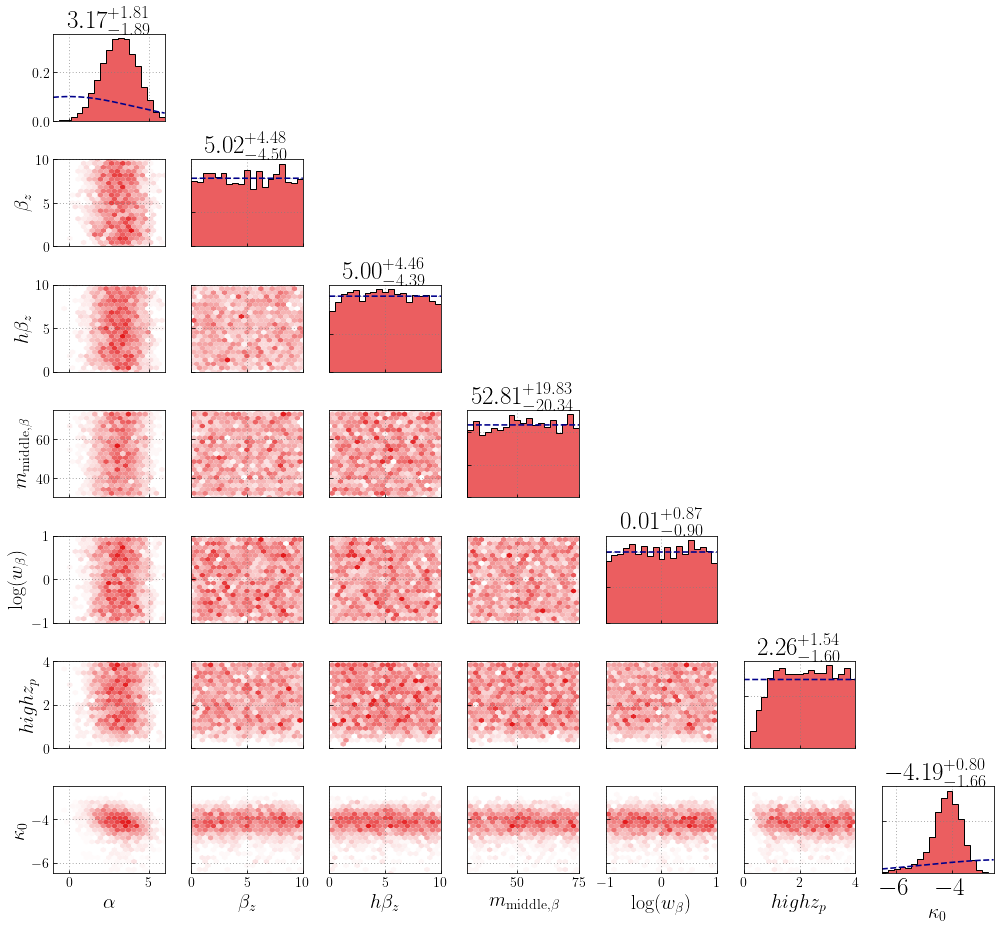

In [22]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,6),"label":r"$\alpha$"},
    "beta_z":{"data":stacked_samples_no_GWB.beta_z,"plot_bounds":(0,10),"label":r"$\beta_z$"},
    "high_beta_z":{"data":stacked_samples_no_GWB.high_beta_z, "plot_bounds":(0,10),"label":r"$h \beta_z$"},
    "middle_m_beta_z":{"data":stacked_samples_no_GWB.middle_m_beta_z,"plot_bounds":(30,75),"label":r"$m_{\rm middle, \beta}$"},
    "log_width_beta_z":{"data":stacked_samples_no_GWB.log_width_beta_z,"plot_bounds":(-1,1),"label":r"log($w_{\beta}$)"},
    "high_zp":{"data":stacked_samples_no_GWB.high_zp,"plot_bounds":(0,4),"label":r"$high z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},
}

plot_corner(fig,toPlot_no_GWB,'#e31a1c',labelsize=20, priors = new_priors)
plt.savefig("HDPosterior_together_all.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()

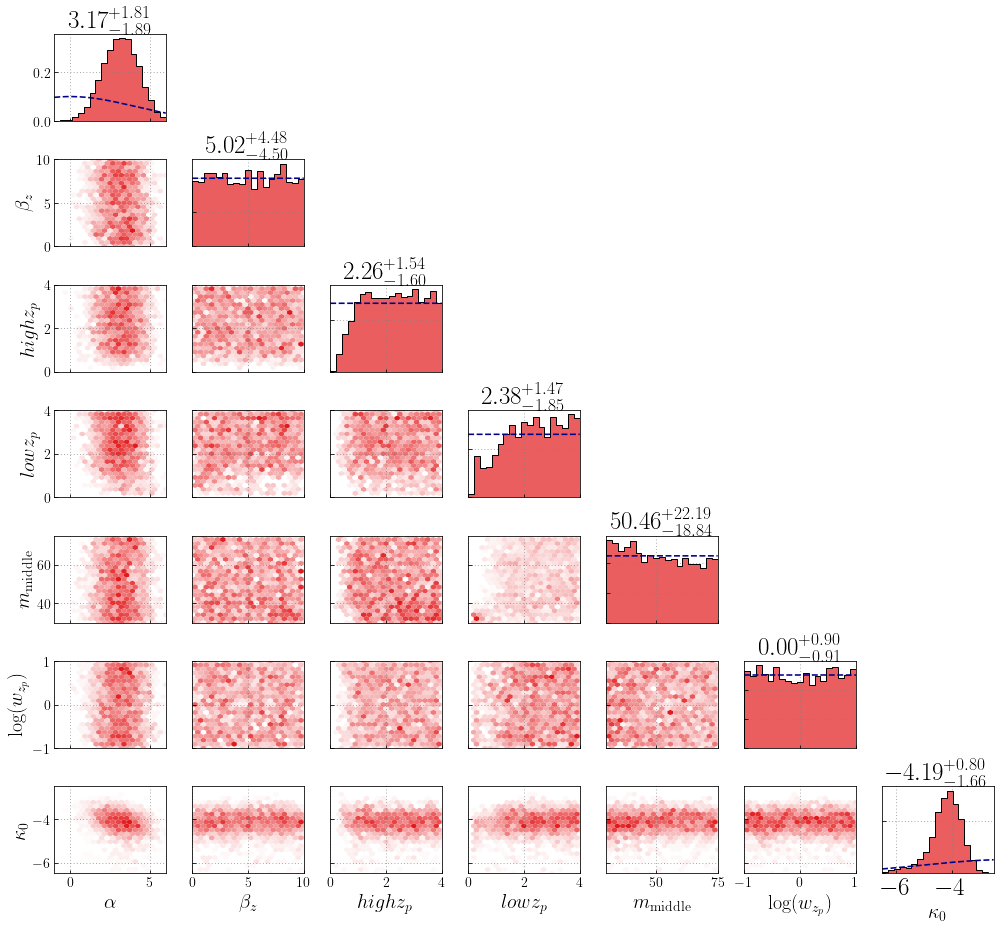

In [23]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data_no_GWB.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,6),"label":r"$\alpha$"},
    "beta_z":{"data":stacked_samples_no_GWB.beta_z,"plot_bounds":(0,10),"label":r"$\beta_z$"},
    "high_zp":{"data":stacked_samples_no_GWB.high_zp,"plot_bounds":(0,4),"label":r"$high z_p$"},
    "low_zp":{"data":stacked_samples_no_GWB.low_zp,"plot_bounds":(0,4),"label":r"$low z_p$"},
    "middle_m_zp":{"data":stacked_samples_no_GWB.middle_m,"plot_bounds":(30,75),"label":r"$m_{\rm middle}$"},
    "log_width_zp":{"data":stacked_samples_no_GWB.log_width_zp,"plot_bounds":(-1,1),"label":r"log($w_{z_p}$)"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\kappa_{0}$"},
}

plot_corner(fig,toPlot_no_GWB,'#e31a1c',labelsize=20, priors = new_priors)
plt.savefig("HDPosterior_together_all.png", dpi=400, bbox_inches='tight')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()

In [6]:
def sigmoid_zp(low, high, width, middle, mass):
    return (high - low) / (1 + jnp.exp(-(1/width)*(mass - middle))) + low

def sigmoid_delta(low, delta, width, middle, mass):
    return (delta) / (1 + jnp.exp(-(1/width)*(mass - middle))) + low

def merger_rate_zp_sigmoid(alpha_z,delta_alpha, width_alpha_z, middle_alpha_z,
                           beta_z, high_beta_z, width_beta_z, middle_beta_z,
                           low_zp, high_zp, width_m, m_middle, masses, z_s):
    alpha_z = sigmoid_delta(alpha_z, delta_alpha, width_alpha_z, middle_alpha_z, masses)
    beta_z = sigmoid_zp(beta_z, high_beta_z, width_beta_z, middle_beta_z, masses)
    new_zp = sigmoid_zp(low_zp, high_zp, width_m, m_middle, masses)
    return (1+z_s)**alpha_z/(1+((1+z_s)/(1+new_zp))**(alpha_z+beta_z))

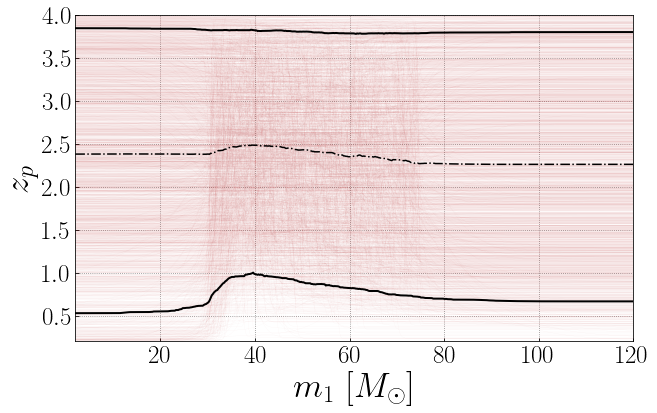

In [27]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

mergerrate_matrix = np.zeros((len(range(samps_no_gwb.alpha_ref.size)), len(m_grid)))
for i in range(samps_no_gwb.alpha_ref.size):
    zp = sigmoid_zp(samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], m_grid)
    ax.plot(m_grid, zp, color='#e31a1c', lw=0.1, alpha = 0.1, rasterized = True)
    mergerrate_matrix[i, :] = zp
    
mean_merger = np.median(mergerrate_matrix, axis = 0)
    
# ax.set_yscale('log')
ax.set_xlim(2,120)
ax.set_ylim(0.2,4)
ax.set_xlabel(r"$m_1$ [$M_{\odot}$]", fontsize = 35)
ax.set_ylabel(r"$z_p$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(m_grid, mean_merger, "-.", c="k", rasterized=True)
plt.plot(m_grid,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(m_grid,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

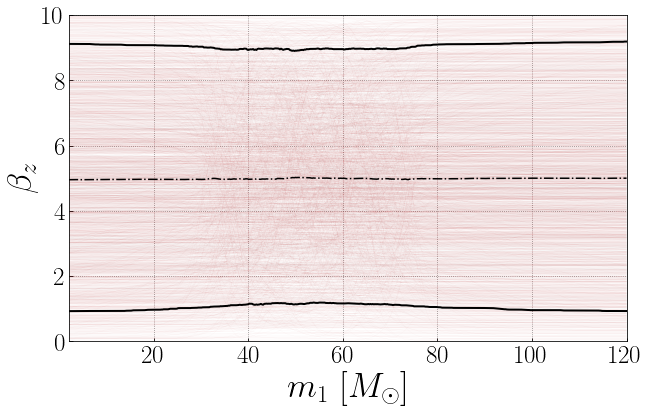

In [31]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

mergerrate_matrix = np.zeros((len(range(samps_no_gwb.alpha_ref.size)), len(m_grid)))
for i in range(samps_no_gwb.alpha_ref.size):
    zp = sigmoid_zp(samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i], m_grid)
    ax.plot(m_grid, zp, color='#e31a1c', lw=0.1, alpha = 0.1, rasterized = True)
    mergerrate_matrix[i, :] = zp
    
mean_merger = np.median(mergerrate_matrix, axis = 0)
    
# ax.set_yscale('log')
ax.set_xlim(2,120)
ax.set_ylim(0,10)
ax.set_xlabel(r"$m_1$ [$M_{\odot}$]", fontsize = 35)
ax.set_ylabel(r"$\beta_z$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(m_grid, mean_merger, "-.", c="k", rasterized=True)
plt.plot(m_grid,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(m_grid,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

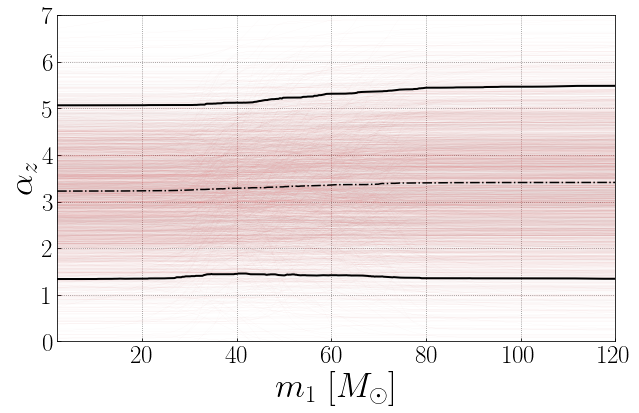

In [35]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

mergerrate_matrix = np.zeros((len(range(samps_no_gwb.alpha_ref.size)), len(m_grid)))
for i in range(samps_no_gwb.alpha_ref.size):
    zp = sigmoid_delta(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i], m_grid)
    ax.plot(m_grid, zp, color='#e31a1c', lw=0.1, alpha = 0.1, rasterized = True)
    mergerrate_matrix[i, :] = zp
    
mean_merger = np.median(mergerrate_matrix, axis = 0)
    
# ax.set_yscale('log')
ax.set_xlim(2,120)
ax.set_ylim(0,7)
ax.set_xlabel(r"$m_1$ [$M_{\odot}$]", fontsize = 35)
ax.set_ylabel(r"$\alpha_z$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(m_grid, mean_merger, "-.", c="k", rasterized=True)
plt.plot(m_grid,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(m_grid,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

In [7]:
def massModel_no_variation(m1, alpha_ref, mu_m1, sig_m1, f_peak, mMax, mMin, dmMax, dmMin):
    p_m1_pl = (1.+alpha_ref)*m1**(alpha_ref)/(tmp_max**(1.+alpha_ref) - tmp_min**(1.+alpha_ref))

    p_m1_peak = jnp.exp(-(m1-mu_m1)**2/(2.*sig_m1**2))/jnp.sqrt(2.*np.pi*sig_m1**2)

    # Compute low- and high-mass filters
    low_filter = jnp.exp(-(m1-mMin)**2/(2.*dmMin**2))
    low_filter = jnp.where(m1<mMin,low_filter,1.)
    high_filter = jnp.exp(-(m1-mMax)**2/(2.*dmMax**2))
    high_filter = jnp.where(m1>mMax,high_filter,1.)

    combined_p = jnp.array((f_peak*p_m1_peak + (1. - f_peak)*p_m1_pl)*low_filter*high_filter)
    return combined_p

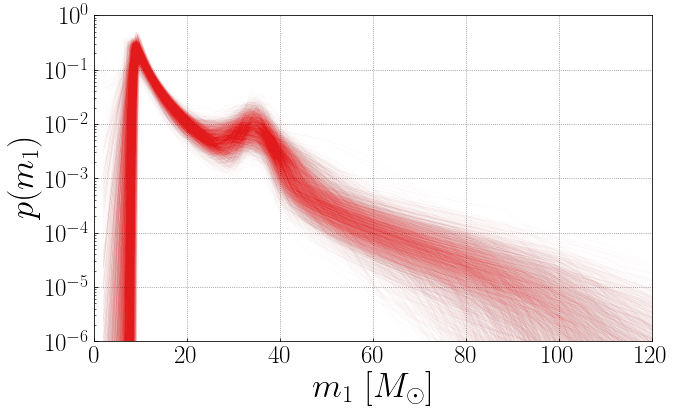

In [37]:
fig,ax = plt.subplots(figsize=(10,6))
m_grid = np.linspace(2,120,500)

for i in range(samps_no_gwb.alpha_ref.size):
    p_m = massModel_no_variation(m_grid,samps_no_gwb.alpha_ref.values[i], samps_no_gwb.mu_m1.values[i],samps_no_gwb.sig_m1.values[i],
                    10.**samps_no_gwb.log_f_peak.values[i],samps_no_gwb.mMax.values[i],samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i])    
    p_m /= np.trapz(p_m,m_grid)    
    ax.plot(m_grid,p_m,color='#e31a1c',lw=0.1,alpha=0.1, rasterized = True)
    
ax.set_yscale('log')
ax.set_xlim(0,120)
ax.set_ylim(1e-6,1)
ax.set_xlabel(r"$m_1$ [$M_{\odot}$]", fontsize = 35)
ax.set_ylabel(r"$p(m_1)$", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("p(m)_z_0.2_GWBadded.png", dpi=200, bbox_inches='tight')
plt.show()

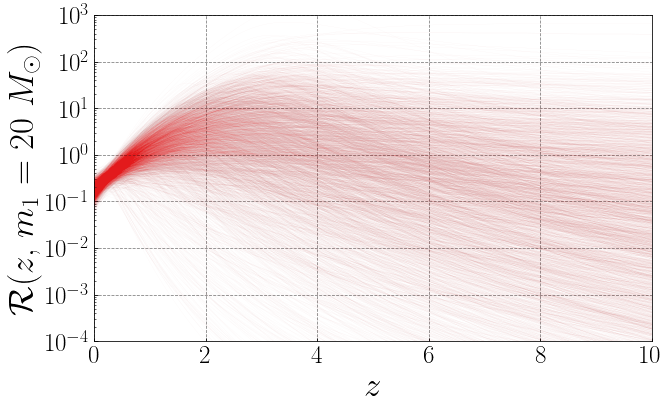

In [42]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
M = 20
for i in range(stacked_samples_no_GWB.alpha_ref.size):    
    p_z = massModel_no_variation(M,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], M, z_grid)
    p_z /= merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], 20, 0.2)
    p_20 = massModel_no_variation(20.,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= stacked_samples_no_GWB.R20.values[i]/p_20 # overall factor of evolving R
    ax.plot(z_grid,p_z,color='#e31a1c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-4,1e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = " + f"{M}" + r" $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')

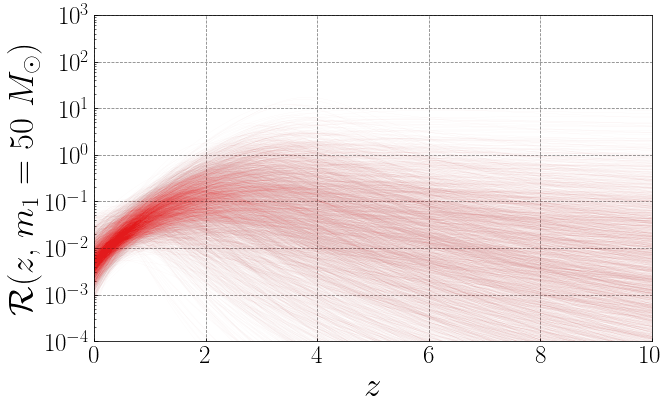

In [43]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
M = 50
for i in range(stacked_samples_no_GWB.alpha_ref.size):    
    p_z = massModel_no_variation(M,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], M, z_grid)
    p_z /= merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], 20, 0.2)
    p_20 = massModel_no_variation(20.,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= stacked_samples_no_GWB.R20.values[i]/p_20 # overall factor of evolving R
    ax.plot(z_grid,p_z,color='#e31a1c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-4,1e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = " + f"{M}" + r" $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')

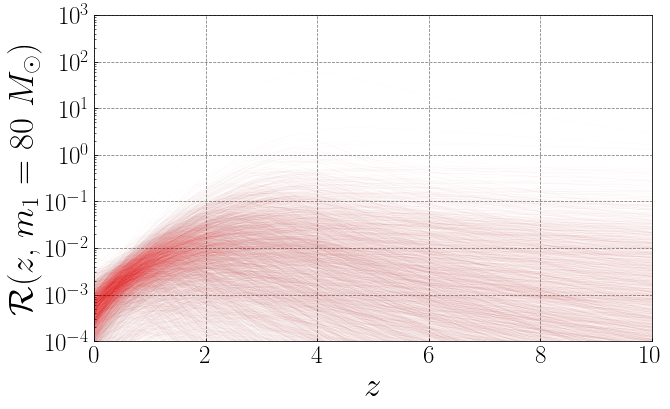

In [44]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
M = 80
for i in range(stacked_samples_no_GWB.alpha_ref.size):    
    p_z = massModel_no_variation(M,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], M, z_grid)
    p_z /= merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], 20, 0.2)
    p_20 = massModel_no_variation(20.,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= stacked_samples_no_GWB.R20.values[i]/p_20 # overall factor of evolving R
    ax.plot(z_grid,p_z,color='#e31a1c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-4,1e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = " + f"{M}" + r" $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')

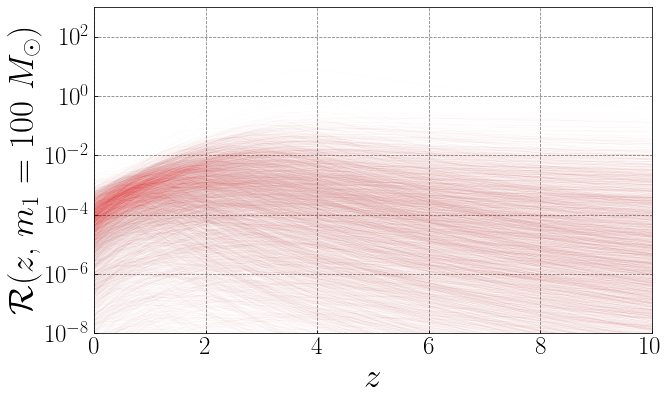

In [45]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
M = 100
for i in range(stacked_samples_no_GWB.alpha_ref.size):    
    p_z = massModel_no_variation(M,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], M, z_grid)
    p_z /= merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], 20, 0.2)
    p_20 = massModel_no_variation(20.,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= stacked_samples_no_GWB.R20.values[i]/p_20 # overall factor of evolving R
    ax.plot(z_grid,p_z,color='#e31a1c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_ylim(1e-8,1e3)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = " + f"{M}" + r" $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')

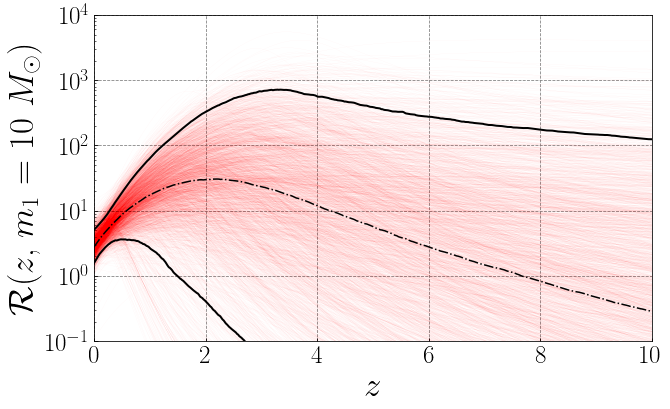

In [28]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)

M = 10

mergerrate_matrix = np.zeros((len(range(stacked_samples.alpha_ref.size)), len(z_grid)))

for i in range(stacked_samples.alpha_ref.size):
    p_z = massModel_no_variation(M,stacked_samples.alpha_ref.values[i], stacked_samples.mu_m1.values[i],stacked_samples.sig_m1.values[i],
                    10.**stacked_samples.log_f_peak.values[i],stacked_samples.mMax.values[i],stacked_samples.mMin.values[i],
                    10.**stacked_samples.log_dmMax.values[i],10.**stacked_samples.log_dmMin.values[i])
    p_z *= merger_rate_zp_sigmoid(stacked_samples.alpha_z.values[i], stacked_samples.beta_z.values[i],
                                  stacked_samples.low_zp.values[i], stacked_samples.high_zp.values[i],
                                  10.**stacked_samples.log_width_zp.values[i], stacked_samples.middle_m.values[i], np.array([M]), z_grid)
    p_z /= merger_rate_zp_sigmoid(stacked_samples.alpha_z.values[i], stacked_samples.beta_z.values[i],
                                  stacked_samples.low_zp.values[i], stacked_samples.high_zp.values[i],
                                  10.**stacked_samples.log_width_zp.values[i], stacked_samples.middle_m.values[i], np.array([20]), 0.2)
    p_20 = massModel_no_variation(20.,stacked_samples.alpha_ref.values[i], stacked_samples.mu_m1.values[i],stacked_samples.sig_m1.values[i],
                    10.**stacked_samples.log_f_peak.values[i],stacked_samples.mMax.values[i],stacked_samples.mMin.values[i],
                    10.**stacked_samples.log_dmMax.values[i],10.**stacked_samples.log_dmMin.values[i])
    p_z *= stacked_samples.R20.values[i]/p_20 # overall factor of evolving R
    ax.plot(z_grid,p_z,color='red',lw=0.1,alpha=0.1, rasterized = True)
    
    p_z = massModel_no_variation(M,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= merger_rate_zp_sigmoid(stacked_samples_no_GWB.alpha_z.values[i], stacked_samples_no_GWB.beta_z.values[i],
                                  stacked_samples_no_GWB.low_zp.values[i], stacked_samples_no_GWB.high_zp.values[i],
                                  10.**stacked_samples_no_GWB.log_width_zp.values[i], stacked_samples_no_GWB.middle_m.values[i], np.array([M]), z_grid)
    p_z /= merger_rate_zp_sigmoid(stacked_samples_no_GWB.alpha_z.values[i], stacked_samples_no_GWB.beta_z.values[i],
                                  stacked_samples_no_GWB.low_zp.values[i], stacked_samples_no_GWB.high_zp.values[i],
                                  10.**stacked_samples_no_GWB.log_width_zp.values[i], stacked_samples_no_GWB.middle_m.values[i], np.array([20]), 0.2)
    p_20 = massModel_no_variation(20.,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z *= stacked_samples_no_GWB.R20.values[i]/p_20 # overall factor of evolving R
    # ax.plot(z_grid,p_z,color='black',lw=0.1,alpha=0.1, rasterized = True)
    mergerrate_matrix[i, :] = p_z
    
mean_merger = np.median(mergerrate_matrix, axis = 0)

ax.set_yscale('log')
ax.set_ylim(1e-1,1e4)
ax.set_xlim(0,10)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$\mathcal{R}$($z$, $m_1$ = 10 $M_{\odot}$)", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(visible=True, which='major', axis='both',linestyle='--')
plt.plot(z_grid, mean_merger, "-.", c="k", rasterized=True)
plt.plot(z_grid,np.quantile(mergerrate_matrix,0.05,axis=0), rasterized=True, color='k', lw=2, alpha=1)
plt.plot(z_grid,np.quantile(mergerrate_matrix,0.95,axis=0), rasterized=True, color='k', lw=2, alpha=1)

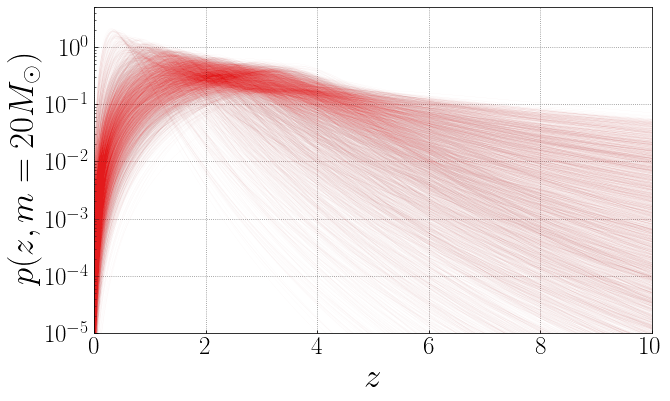

In [47]:
fig,ax = plt.subplots(figsize=(10,6))
z_grid = np.linspace(0,10,500)
for i in range(stacked_samples_no_GWB.alpha_ref.size):    
    p_z_no_gwb = massModel_no_variation(20,stacked_samples_no_GWB.alpha_ref.values[i], stacked_samples_no_GWB.mu_m1.values[i],stacked_samples_no_GWB.sig_m1.values[i],
                    10.**stacked_samples_no_GWB.log_f_peak.values[i],stacked_samples_no_GWB.mMax.values[i],stacked_samples_no_GWB.mMin.values[i],
                    10.**stacked_samples_no_GWB.log_dmMax.values[i],10.**stacked_samples_no_GWB.log_dmMin.values[i])
    p_z_no_gwb *=  merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], 20, z_grid)
    p_z_no_gwb *= 1/(1+z_grid) # Factor to go from source frame to detector frame
    p_z_no_gwb *= 4.*np.pi*Planck15.differential_comoving_volume(z_grid).to(u.Gpc**3/u.sr).value # to go from per Volume to per z
    p_z_no_gwb /= np.trapz(p_z_no_gwb,z_grid) 
    ax.plot(z_grid,p_z_no_gwb,color='#e31a1c',lw=0.1,alpha=0.1, rasterized = True)

ax.set_yscale('log')
ax.set_xlim(0,10)
ax.set_ylim(1e-5,5)
ax.set_xlabel(r"$z$", fontsize=35)
ax.set_ylabel(r"$p(z,m = 20 M_{\odot})$", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("p(z)_m_20_GWBadded_and_noGWB.png", dpi=200, bbox_inches='tight')
plt.show()

In [9]:
def make_figure(M):
    """
    Generates a figure displaying the probability distribution of redshift (z) for a given primary mass (M).

    This function calculates the probability distribution of redshift (z) for a given primary mass (M).
    It plots the resulting probability distribution and saves it as an image file.

    Parameters
    ----------
    M : float
        The primary mass (in solar masses) for which the probability distribution of redshift will be calculated and plotted.

    Notes
    -----
    This function requires the following global variables or imports:
    - plt: matplotlib.pyplot
    - np: numpy
    - samps_no_gwb: DataFrame containing parameters obtained from a GWB model
    - massModel_no_variation: Function to calculate the mass model without variation
    - merger_rate_zp_sigmoid: Function to calculate the merger rate with variation
    - Planck15: Cosmological parameters from astropy.cosmology

    Example
    -------
    >>> make_figure(40)
    """

    fig,ax = plt.subplots(figsize=(10,6))
    z_grid = np.linspace(0,10,500)
    for i in range(samps_no_gwb.alpha_ref.size):
        p_z_no_gwb = massModel_no_variation(M,samps_no_gwb.alpha_ref.values[i], samps_no_gwb.mu_m1.values[i],samps_no_gwb.sig_m1.values[i],
                    10.**samps_no_gwb.log_f_peak.values[i],samps_no_gwb.mMax.values[i],samps_no_gwb.mMin.values[i],
                    10.**samps_no_gwb.log_dmMax.values[i],10.**samps_no_gwb.log_dmMin.values[i])
        p_z_no_gwb *=  merger_rate_zp_sigmoid(samps_no_gwb.alpha_z.values[i], samps_no_gwb.delta_alpha_z.values[i], 10.**samps_no_gwb.log_width_alpha_z.values[i], samps_no_gwb.middle_m_alpha_z.values[i],
                           samps_no_gwb.beta_z.values[i], samps_no_gwb.high_beta_z.values[i], 10.**samps_no_gwb.log_width_beta_z.values[i], samps_no_gwb.middle_m_beta_z.values[i],
                           samps_no_gwb.low_zp.values[i], samps_no_gwb.high_zp.values[i], 10.**samps_no_gwb.log_width_zp.values[i], samps_no_gwb.middle_m.values[i], M, z_grid)
        p_z_no_gwb *= 1/(1+z_grid) # Factor to go from source frame to detector frame
        p_z_no_gwb *= 4.*np.pi*Planck15.differential_comoving_volume(z_grid).to(u.Gpc**3/u.sr).value # to go from per Volume to per z
        p_z_no_gwb /= np.trapz(p_z_no_gwb,z_grid) 
        ax.plot(z_grid,p_z_no_gwb,color='#e31a1c',lw=0.1,alpha=0.1, rasterized = True)
    
    ax.set_yscale('log')
    ax.set_xlim(0,10)
    ax.set_ylim(1e-5,5)
    ax.set_xlabel(r"$z$", fontsize=35)
    ax.set_ylabel(r"$p(z,m = " + str(M) + r" M_{\odot})$", fontsize=35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.savefig("p(z)_m_40_GWBadded_and_noGWB.png", dpi=200, bbox_inches='tight')
    plt.show()

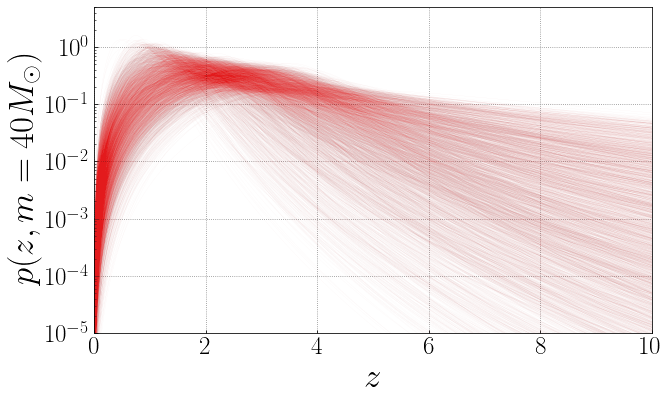

In [10]:
make_figure(40)

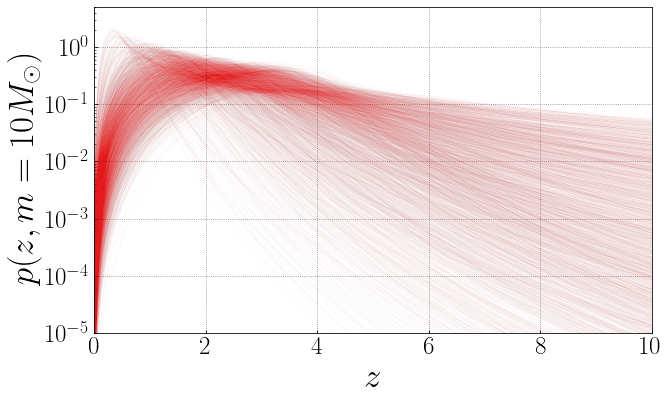

In [11]:
make_figure(10)

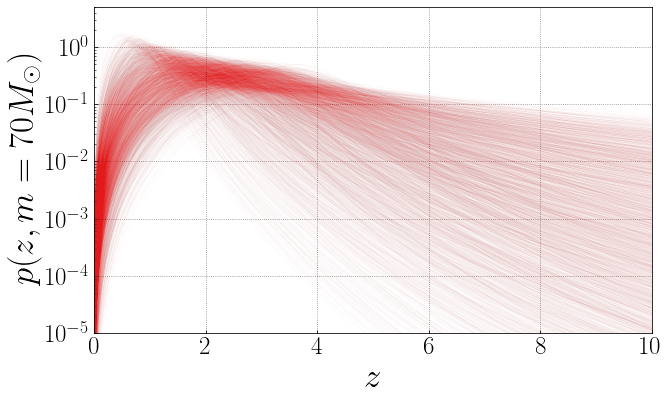

In [12]:
make_figure(70)

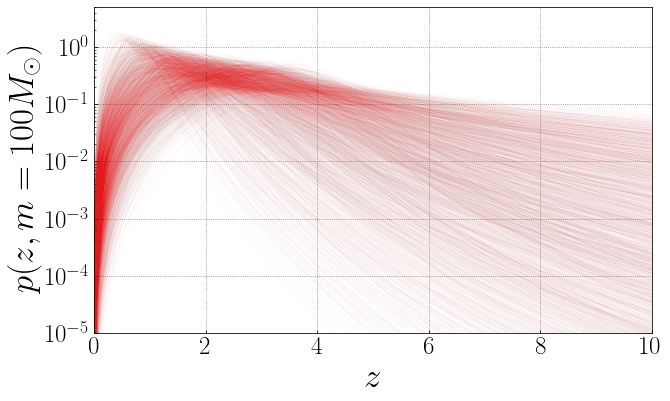

In [13]:
make_figure(100)

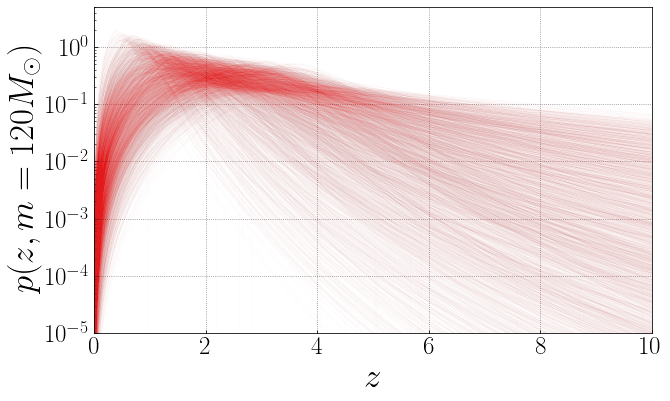

In [14]:
make_figure(120)